In [179]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

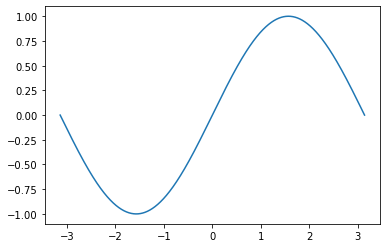

In [181]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

plt.figure()
plt.plot(x, y)

xx = x.unsqueeze(-1).pow(torch.tensor([1, 2, 3]))

y_pred:  tensor([ 6.2099,  6.1957,  6.1815,  ..., -3.0326, -3.0410, -3.0494],
       grad_fn=<ViewBackward>)


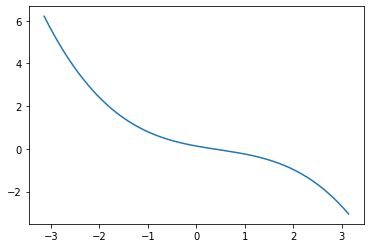

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


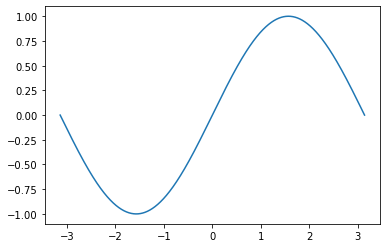

y_result:  tensor([ 6.2099,  6.1957,  6.1815,  ..., -3.0326, -3.0410, -3.0494])


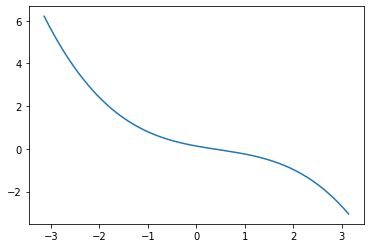

y_pred:  tensor([-0.3880, -0.3894, -0.3907,  ...,  0.3317,  0.3300,  0.3283],
       grad_fn=<ViewBackward>)


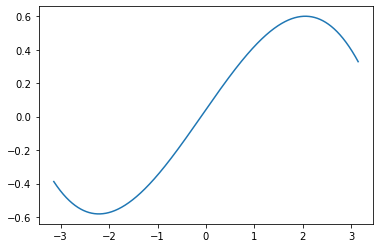

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


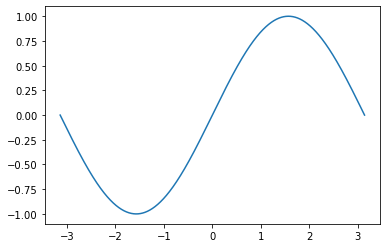

y_result:  tensor([-0.3880, -0.3894, -0.3907,  ...,  0.3317,  0.3300,  0.3283])


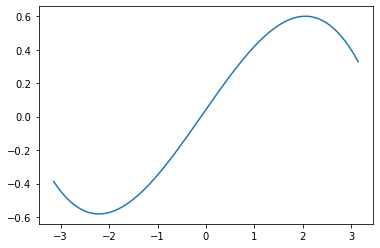

y_pred:  tensor([-0.0095, -0.0139, -0.0182,  ..., -0.0067, -0.0111, -0.0156],
       grad_fn=<ViewBackward>)


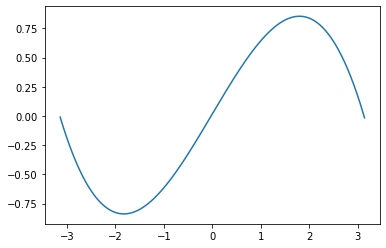

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


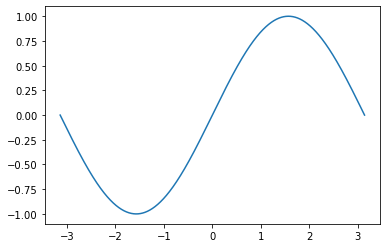

y_result:  tensor([-0.0095, -0.0139, -0.0182,  ..., -0.0067, -0.0111, -0.0156])


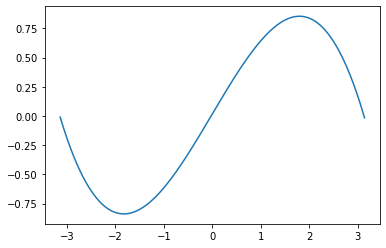

y_pred:  tensor([ 0.1262,  0.1208,  0.1154,  ..., -0.1259, -0.1313, -0.1367],
       grad_fn=<ViewBackward>)


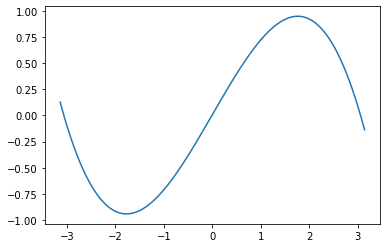

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


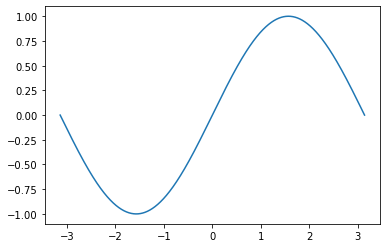

y_result:  tensor([ 0.1262,  0.1208,  0.1154,  ..., -0.1259, -0.1313, -0.1367])


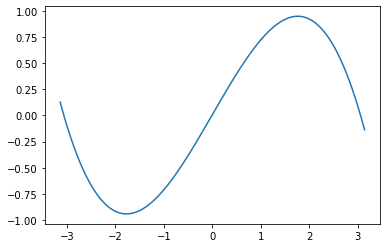

In [182]:
model = torch.nn.Sequential(
#     torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
lr = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    
    if t % 500 == 0:
        linear_layer = model[0]
        y_result = linear_layer.bias.item() + \
           linear_layer.weight[:, 0].item()*x + \
           linear_layer.weight[:, 1].item()*x**2 + \
           linear_layer.weight[:, 2].item()*x**3
        print('y_pred: ', y_pred)
        plt.figure()
        plt.plot(x, y_pred.detach().numpy())
        plt.show()
        
        print('y: ', y)
        plt.figure()
        plt.plot(x, y.detach().numpy())
        plt.show()
        
        print('y_result: ', y_result)
        plt.figure()
        plt.plot(x, y_result.detach().numpy())
        plt.show()
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

In [183]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 8.3688e-01, -5.4727e-04, -9.0506e-02]])),
             ('0.bias', tensor([0.0032]))])

In [184]:
linear_layer = model[0]
y_result = linear_layer.bias.item() + \
   linear_layer.weight[:, 0].item()*x + \
   linear_layer.weight[:, 1].item()*x**2 + \
   linear_layer.weight[:, 2].item()*x**3

In [185]:
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.0031722455751150846 + 0.8368841409683228 x + -0.0005472656921483576 x^2 + -0.0905059427022934 x^3


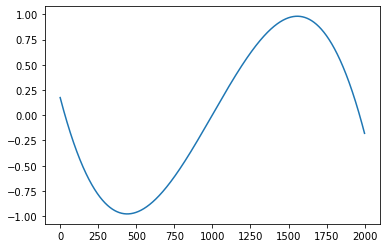

In [186]:
plt.figure()
plt.plot(y_result)

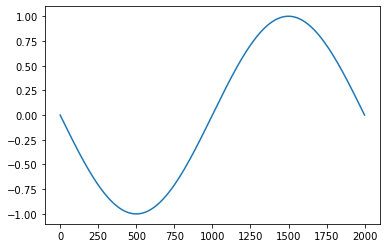

In [187]:
plt.plot(torch.sin(x))

In [188]:
#how can we recreate the above using two layers? 

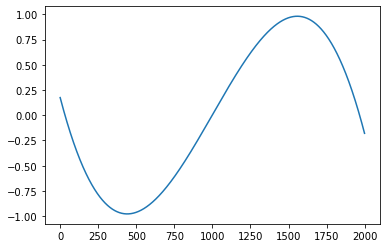

In [189]:
plt.plot(y_pred.detach())